In [1]:
from deap import base, algorithms
from deap import creator
from deap import tools

import algelitism
from graph_show import show_graph

import random
import matplotlib.pyplot as plt
import numpy as np

gen	nevals	min	avg   
0  	500   	117	936.65
1  	92    	117	713.192
2  	76    	117	557.3  
3  	88    	117	467.422
4  	78    	117	381.012
5  	71    	117	326.274
6  	98    	21 	272.148
7  	75    	21 	212.284
8  	91    	21 	170.534
9  	83    	20 	134.984
10 	85    	20 	108.61 
11 	107   	20 	102.28 
12 	66    	20 	55.198 
13 	65    	20 	27.974 
14 	96    	20 	54.248 
15 	74    	20 	32.742 
16 	85    	20 	28.602 
17 	71    	20 	23.996 
18 	81    	20 	25.136 
19 	57    	20 	23.024 
20 	99    	20 	24.736 
21 	80    	20 	22.566 
22 	86    	20 	26.318 
23 	78    	20 	28.114 
24 	82    	20 	25.066 
25 	84    	20 	21.426 
26 	88    	20 	23.802 
27 	96    	20 	26.222 
28 	104   	20 	27.126 
29 	82    	20 	23.052 
30 	88    	20 	26.858 
[[0, 1, 4, 3, 5, 2], [1, 5, 3, 2, 4, 0], [2, 4, 0, 3, 5, 1], [3, 0, 4, 1, 2, 5], [2, 4, 3, 1, 0, 5], [3, 5, 1, 0, 2, 4]]


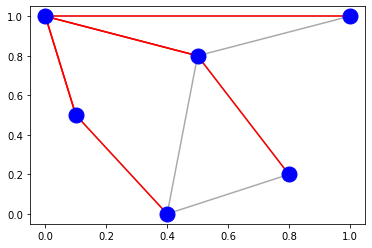

In [2]:
inf = 100
D = ((0, 3, 1, 3, inf, inf),
     (3, 0, 4, inf, inf, inf),
     (1, 4, 0, inf, 7, 5),
     (3, inf, inf, 0, inf, 2),
     (inf, inf, 7, inf, 0, 4),
     (inf, inf, 5, 2, 4, 0))

startV = 0              # стартовая вершина
LENGTH_D = len(D)
LENGTH_CHROM = len(D)*len(D[0])    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 500   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.1        # вероятность мутации индивидуума
MAX_GENERATIONS = 30    # максимальное количество поколений
HALL_OF_FAME_SIZE = 1

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("randomOrder", random.sample, range(LENGTH_D), LENGTH_D)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.randomOrder, LENGTH_D)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)


def dikstryFitness(individual):
    s = 0
    for n, path in enumerate(individual):
        path = path[:path.index(n)+1]

        si = startV
        for j in path:
            s += D[si][j]
            si = j

    return s,         # кортеж

def cxOrdered(ind1, ind2):
    for p1, p2 in zip(ind1, ind2):
        tools.cxOrdered(p1, p2)

    return ind1, ind2

def mutShuffleIndexes(individual, indpb):
    for ind in individual:
        tools.mutShuffleIndexes(ind, indpb)

    return individual,


toolbox.register("evaluate", dikstryFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", cxOrdered)
toolbox.register("mutate", mutShuffleIndexes, indpb=1.0/LENGTH_CHROM/10)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)


def show(ax):
    ax.clear()
    show_graph(ax, hof.items[0])

    plt.draw()
    plt.gcf().canvas.flush_events()


plt.ion()
fig, ax = plt.subplots()

population, logbook = algelitism.eaSimpleElitism(population, toolbox,
                                                 cxpb=P_CROSSOVER/LENGTH_D,
                                                 mutpb=P_MUTATION/LENGTH_D,
                                                 ngen=MAX_GENERATIONS,
                                                 halloffame=hof,
                                                 stats=stats,
                                                 callback=(show, (ax, )),
                                                 verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)

plt.ioff()
plt.show()

# plt.plot(maxFitnessValues, color='red')
# plt.plot(meanFitnessValues, color='green')
# plt.xlabel('Поколение')
# plt.ylabel('Макс/средняя приспособленность')
# plt.title('Зависимость максимальной и средней приспособленности от поколения')
#
# fig, ax = plt.subplots()
# show_graph(ax, best)
# plt.show()